# Part of Speech Tagging

is the process of marking up a word in a corpus with its corresponding part of speech, based on both its definition and its context.  It is also called grammatical tagging or word-category disambiguation. 

Part of speech tagging is used in various NLP taskes including:
- word sense disambiguation
- information retrieval
- text to speech
- machine translation

## Exploring Part of Speech Tagging with NLTK

In [1]:
import nltk
from nltk.tokenize import word_tokenize

text = word_tokenize("It is a nice  night")
nltk.pos_tag(text)

[('It', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('nice', 'JJ'), ('night', 'NN')]

Several of the corpora included with NLTK have been tagged for their part-of-speech.   These corpora are potentially useful for training classifiers.

In [34]:
from nltk.corpus import brown
brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [35]:
brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

### Tag Sets
Two tag sets that are frequently used are [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and [Universal](https://universaldependencies.org/u/pos/).

### Automatic Tagging with NLTK
There are several taggers available in NLTK.  We'll look at the default tagger, regex tagger, unigram tagger and ngram taggers. 

In [36]:
#find the most frequent POS
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [37]:
#tag text with default tag
raw = "This can be used to establish a baseline"
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('This', 'NN'),
 ('can', 'NN'),
 ('be', 'NN'),
 ('used', 'NN'),
 ('to', 'NN'),
 ('establish', 'NN'),
 ('a', 'NN'),
 ('baseline', 'NN')]

In [38]:
#evaluate default tagger
brown_tagged_sents = brown.tagged_sents(categories='news')
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

The **regular expression tagger** assigns tags to tokens by matching regular expression patterns.

In [39]:
patterns = [
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # simple past
     (r'.*es$', 'VBZ'),                 # 3rd singular present
     (r'.*ould$', 'MD'),                # modals
     (r'.*\'s$', 'NN$'),                # possessive nouns
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                      # nouns (default
]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(tokens)

[('This', 'NNS'),
 ('can', 'NN'),
 ('be', 'NN'),
 ('used', 'VBD'),
 ('to', 'NN'),
 ('establish', 'NN'),
 ('a', 'NN'),
 ('baseline', 'NN')]

In [40]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

**Unigram taggers** assign the tag that is most likely for a particular token. A Unigram tagger is trained by specifying tagged sentence data as a parameter when the tagger is initiaized. The training process involves inspecting the tag of each word and storing the most likely tag for any word in a dictionary, stored inside the tagger.

In [41]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[1230])

[('Dick', 'NP'),
 ('McAuliffe', 'NP'),
 ('cracked', 'VBD'),
 ('the', 'AT'),
 ('first', 'OD'),
 ('of', 'IN'),
 ('his', 'PP$'),
 ('two', 'CD'),
 ('doubles', 'NNS'),
 ('against', 'IN'),
 ('Lefty', 'NN-TL'),
 ('Don', 'NP'),
 ('Rudolph', 'NP'),
 ('to', 'TO'),
 ('open', 'JJ'),
 ('the', 'AT'),
 ("Bear's", 'NN$-TL'),
 ('attack', 'NN'),
 ('.', '.')]

In [42]:
#training and testing a tagger
size = int(len(brown_tagged_sents) * 0.9) #90/10
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

**N-gram taggers** take context into account.  

In [43]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.10206319146815508

You would think that bi-gram taggers would perform better but in this case they perform worse.  Why?

In [44]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t2.evaluate(test_sents)

0.8452108043456593

### Lemmatization with POS tags

In [45]:
sentence = ['if', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere']
wnl = nltk.WordNetLemmatizer()
lemmatized = [wnl.lemmatize(t) for t in sentence]
lemmatized

['if',
 'you',
 'have',
 'not',
 'been',
 'out',
 'clearing',
 'already',
 'then',
 'you',
 'are',
 'not',
 'going',
 'anywhere']

In [46]:
tagged_sentence = nltk.pos_tag(sentence)
tagged_sentence

[('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('not', 'RB'),
 ('been', 'VBN'),
 ('out', 'RP'),
 ('clearing', 'VBG'),
 ('already', 'RB'),
 ('then', 'RB'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('not', 'RB'),
 ('going', 'VBG'),
 ('anywhere', 'RB')]

In [47]:
from nltk.corpus import wordnet

#Map POS tag to first character lemmatize() accepts
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

word_net_pos = [(word, get_wordnet_pos(pos_tag)) for(word, pos_tag) in tagged_sentence]
word_net_pos

[('if', 'n'),
 ('you', 'n'),
 ('have', 'v'),
 ('not', 'r'),
 ('been', 'v'),
 ('out', 'r'),
 ('clearing', 'v'),
 ('already', 'r'),
 ('then', 'r'),
 ('you', 'n'),
 ('are', 'v'),
 ('not', 'r'),
 ('going', 'v'),
 ('anywhere', 'r')]

In [48]:
lemmatized = [wnl.lemmatize(word, tag) for word, tag in word_net_pos]
lemmatized

['if',
 'you',
 'have',
 'not',
 'be',
 'out',
 'clear',
 'already',
 'then',
 'you',
 'be',
 'not',
 'go',
 'anywhere']

## Using Part of Speech Tagging

We can also part of speech tagging to help us better understand our data. In this demonstration our data is Fake News Corpus from Kaggle.  Download the data from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset and place in the data directory.

### Preprocessing

See the code in week 1 for detailed explanation.

In [3]:
import pandas as pd
news_fake = pd. read_csv('data/Fake.csv')
news_fake.insert(0, 'label', 'fake')
news_true = pd.read_csv('data/True.csv')
news_true.insert(0, 'label', 'true')
news = pd.concat([news_true, news_fake], ignore_index=True)
news.head()

,label,title,text,subject,date
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


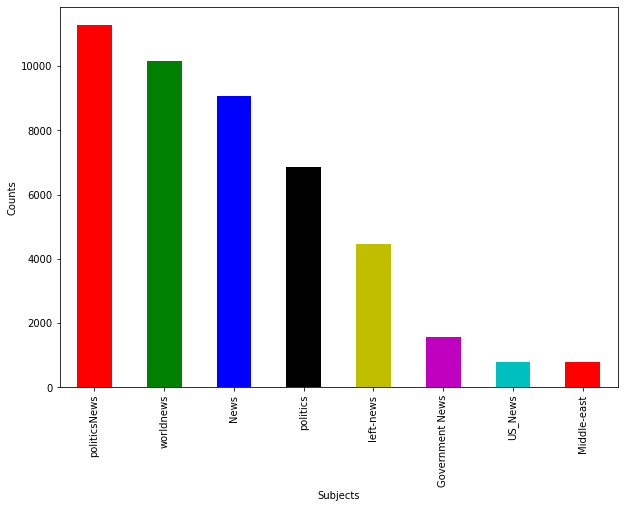

In [4]:
# Visualization of subjects
import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))
plt.xlabel("Subjects")
plt.ylabel("Counts")

news.subject.value_counts().plot(kind='bar', color=color_list )

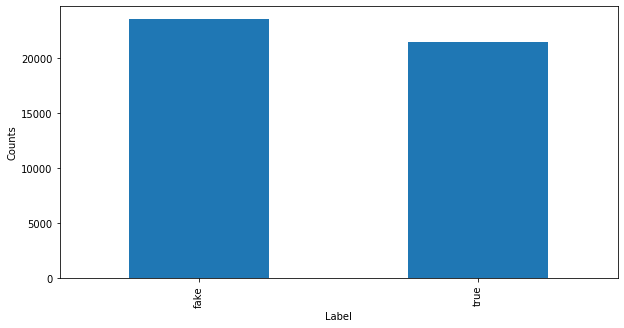

In [5]:
# visualization of classification
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.xlabel("Label")
plt.ylabel("Counts")

news.label.value_counts().plot(kind='bar' )

### For POS tagging we will only consider the title

In [7]:
title_df = news['title']
title_df = title_df.to_frame()
title_df.sample(10, random_state = 5)

,title
10128,Supreme Court sympathetic to property owner in...
43165,LAWS ARE FOR THE COMMON MAN…NOT FOR BARRY SOET...
14627,Turkey 'appalled' by U.S. stance on IS withdra...
17654,Germany extends passport controls on Austrian ...
28412,Ted Cruz: I’m ‘Honored’ By Support Of This De...
24070,California May Stop Paying Taxes To Federal G...
2130,Trump mulling lifting status of Cyber Command:...
15083,Suspects held in Franco-Swiss swoop face terro...
38593,OBAMA’S AMERICA: INCOMING U.S. CITIZENS NO LON...
25009,Obama Eyeing Digital Media Career Post-Presid...


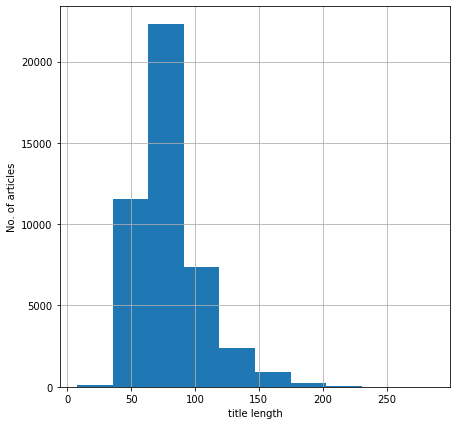

In [8]:
# visualizing title length
plt.figure(figsize=(7,7))
plt.xlabel("title length")
plt.ylabel("No. of articles")

title_df['title'].str.len().hist()

### Preprocessing the Data

Remove contractions, normalize case, remove special characters

In [10]:
import contractions
import re

title_df['title'] = title_df['title'].apply(lambda title: [contractions.fix(word) for word in title.split()]) #fix contractions
title_df['title'] = [' '.join(map(str, l)) for l in title_df['title']] # joining back into a string
title_df['title'] = title_df['title'].str.lower() #convert to lowercse
title_df['title'] = title_df['title'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x)) #remove special characters
title_df.sample(10, random_state = 5)

,title
10128,supreme court sympathetic to property owner in...
43165,laws are for the common mannot for barry soeto...
14627,turkey 'appalled' by yous stance on is withdra...
17654,germany extends passport controls on austrian ...
28412,ted cruz i am honored by support of this demon...
24070,california may stop paying taxes to federal go...
2130,trump mulling lifting status of cyber command ...
15083,suspects held in francoswiss swoop face terror...
38593,obamas america incoming yous citizens no longe...
25009,obama eyeing digital media career postpresidency


Regex explanation:

1. [^] matches everything but everything inside the blockquotes
2. \w matches any word character (equal to [a-zA-Z0-9_])
3. \d matches a digit (equal to [0-9])
4. \s matches any whitespace character (equal to [\r\n\t\f\v ])
5. \' matches the character ' literally (case sensitive)
6. '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [11]:
from nltk.tokenize import word_tokenize
title_df['tokenized_title'] = title_df['title'].apply(word_tokenize)
title_df.sample(10, random_state = 5)

,title,tokenized_title
10128,supreme court sympathetic to property owner in...,"[supreme, court, sympathetic, to, property, ow..."
43165,laws are for the common mannot for barry soeto...,"[laws, are, for, the, common, mannot, for, bar..."
14627,turkey 'appalled' by yous stance on is withdra...,"[turkey, 'appalled, ', by, yous, stance, on, i..."
17654,germany extends passport controls on austrian ...,"[germany, extends, passport, controls, on, aus..."
28412,ted cruz i am honored by support of this demon...,"[ted, cruz, i, am, honored, by, support, of, t..."
24070,california may stop paying taxes to federal go...,"[california, may, stop, paying, taxes, to, fed..."
2130,trump mulling lifting status of cyber command ...,"[trump, mulling, lifting, status, of, cyber, c..."
15083,suspects held in francoswiss swoop face terror...,"[suspects, held, in, francoswiss, swoop, face,..."
38593,obamas america incoming yous citizens no longe...,"[obamas, america, incoming, yous, citizens, no..."
25009,obama eyeing digital media career postpresidency,"[obama, eyeing, digital, media, career, postpr..."


### Tagging using NLTK

The [nltk.tag.AveragedPerceptronTagger](https://www.nltk.org/_modules/nltk/tag/perceptron.html) is the default tagger for NLTK. The model was trained on on Sections 00-18 of the Wall Street Journal.

In [12]:
import nltk

In [37]:
# to simplify use 10 titles based on the same seed value at 5
tagged_titles = []
tagged = []

for title in title_df['tokenized_title'].sample(10, random_state = 5):
    tagged_title = nltk.pos_tag(title)
    print(tagged_title)
    tagged_titles.append(tagged_title)

[('supreme', 'JJ'), ('court', 'NN'), ('sympathetic', 'JJ'), ('to', 'TO'), ('property', 'NN'), ('owner', 'NN'), ('in', 'IN'), ('wetlands', 'NNS'), ('dispute', 'VBP')]
[('laws', 'NNS'), ('are', 'VBP'), ('for', 'IN'), ('the', 'DT'), ('common', 'JJ'), ('mannot', 'NN'), ('for', 'IN'), ('barry', 'NN'), ('soetoro', 'JJ'), ('obama', 'NN'), ('gives', 'VBZ'), ('work', 'NN'), ('permits', 'NNS'), ('to', 'TO'), ('2000', 'CD'), ('after', 'IN'), ('judge', 'NN'), ('ordered', 'VBD'), ('him', 'PRP'), ('to', 'TO'), ('stop', 'VB')]
[('turkey', 'NN'), ("'appalled", 'VBD'), ("'", 'POS'), ('by', 'IN'), ('yous', 'JJ'), ('stance', 'NN'), ('on', 'IN'), ('is', 'VBZ'), ('withdrawal', 'VBN'), ('from', 'IN'), ('raqqa', 'NN'), ('ministry', 'NN')]
[('germany', 'JJ'), ('extends', 'VBZ'), ('passport', 'NN'), ('controls', 'NNS'), ('on', 'IN'), ('austrian', 'JJ'), ('border', 'NN'), ('flights', 'NNS'), ('from', 'IN'), ('greece', 'NN')]
[('ted', 'VBN'), ('cruz', 'NN'), ('i', 'NN'), ('am', 'VBP'), ('honored', 'VBN'), ('by',

In [36]:
from collections import Counter
combined_lists = [word_tag for title in tagged_titles for word_tag in title]
counts = Counter(tag for word, tag in combined_lists)
for tag in counts:
    print(tag, counts[tag] )

123
JJ 13
NN 38
TO 6
IN 16
NNS 15
VBP 3
DT 4
VBZ 3
CD 1
VBD 2
PRP 2
VB 5
POS 1
VBN 5
MD 2
VBG 5
RB 2


In [23]:
# Yellow Brick is a POS visualizer -https://www.scikit-yb.org/en/latest/api/text/postag.html

!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /Users/cindy/opt/anaconda3/lib/python3.7/site-packages (1.3.post1)
You should consider upgrading via the '/Users/cindy/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


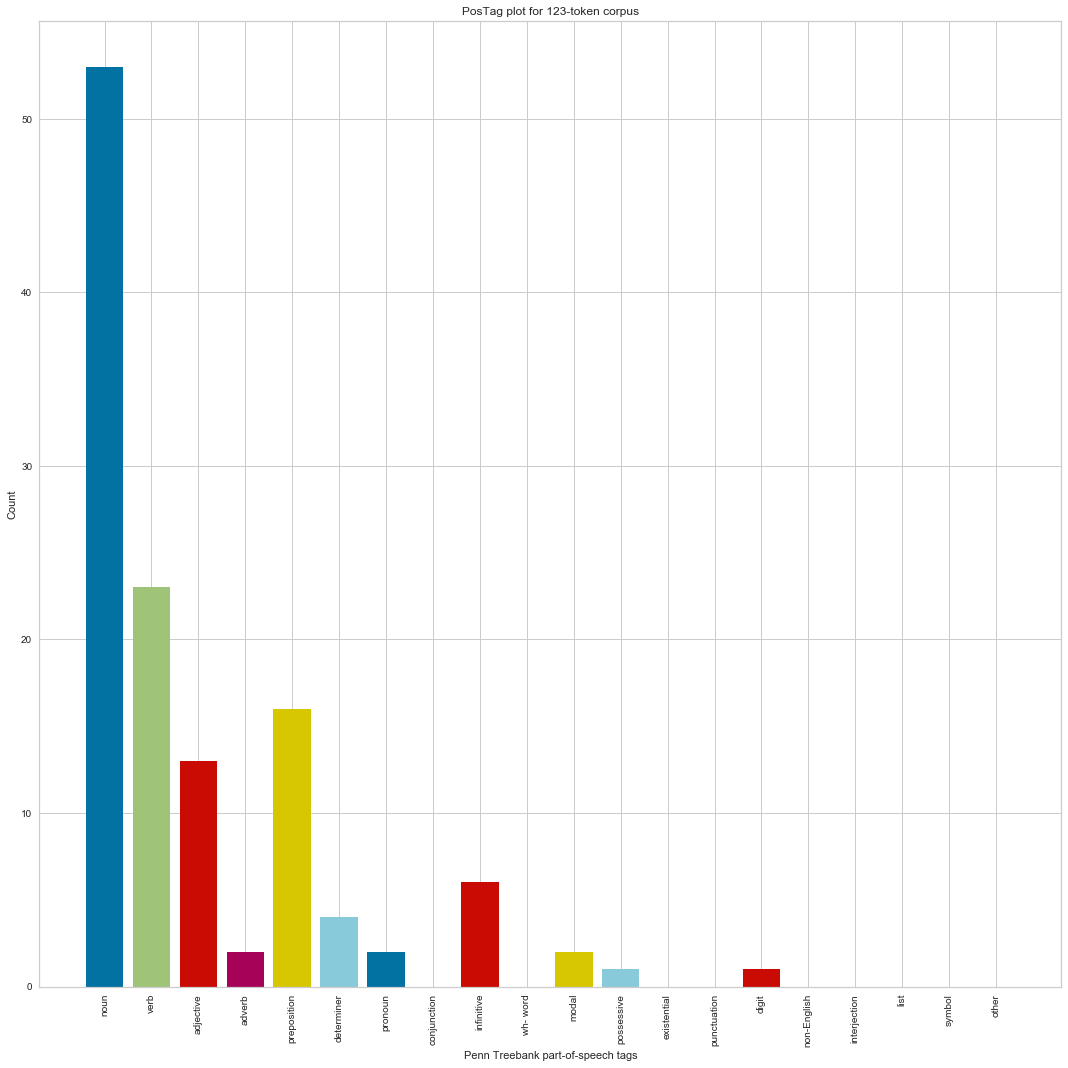

In [24]:
from yellowbrick.text import PosTagVisualizer

tagged.append(tagged_titles) # one item list - this format is needed for visualizer 
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

### Tagging using spaCy

spaCy uses a processing pipline. The tokenizer runs before the components and the processer includes a tagger. You can add custom components using `Language.add_pipe`. More information on the spaCy pipeline is available [here](https://spacy.io/api).
![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [38]:
import spacy

nlp = spacy.load("en_core_web_sm")
title = nlp(title_df["title"].values[10128])

for token in title:
    print(token, token.pos_, token.tag_)

supreme PROPN NNP
court PROPN NNP
sympathetic PROPN NNP
to ADP IN
property NOUN NN
owner NOUN NN
in ADP IN
wetlands PROPN NNP
dispute VERB VBP


In [39]:
tagged_titles_spacy = []
tagged_spacy = []

for title in title_df['title'].sample(10, random_state = 5):
    processed_title = nlp(title)
    tagged_title = [(token, token.tag_) for token in processed_title]
    print(tagged_title)
    tagged_titles_spacy.append(tagged_title)

[(supreme, 'NNP'), (court, 'NNP'), (sympathetic, 'NNP'), (to, 'IN'), (property, 'NN'), (owner, 'NN'), (in, 'IN'), (wetlands, 'NNP'), (dispute, 'VBP')]
[(laws, 'NNS'), (are, 'VBP'), (for, 'IN'), (the, 'DT'), (common, 'JJ'), (mannot, 'NN'), (for, 'IN'), (barry, 'NNP'), (soetoro, 'VBZ'), (obama, 'NNP'), (gives, 'VBZ'), (work, 'NN'), (permits, 'NNS'), (to, 'IN'), (2000, 'CD'), (after, 'IN'), (judge, 'NNP'), (ordered, 'VBD'), (him, 'PRP'), (to, 'TO'), (stop, 'VB')]
[(turkey, 'NNP'), (', '``'), (appalled, 'VBD'), (', "''"), (by, 'IN'), (yous, 'JJ'), (stance, 'NN'), (on, 'IN'), (is, 'VBZ'), (withdrawal, 'NN'), (from, 'IN'), (raqqa, 'NNP'), (ministry, 'NNP')]
[(germany, 'NNP'), (extends, 'VBZ'), (passport, 'NNP'), (controls, 'NNS'), (on, 'IN'), (austrian, 'JJ'), (border, 'NN'), (flights, 'NNS'), (from, 'IN'), (greece, 'NNP')]
[(ted, 'NNP'), (cruz, 'NNP'), (i, 'PRP'), (am, 'VBP'), (honored, 'VBN'), (by, 'IN'), (support, 'NN'), (of, 'IN'), (this, 'DT'), (demonobsessed, 'VBN'), (exorcist, 'NNP'),

In [41]:
combined_lists = [word_tag for title in tagged_titles_spacy for word_tag in title]
counts = Counter(tag for word,tag in combined_lists)
for tag in counts:
    print(tag, counts[tag] )

NNP 24
IN 19
NN 22
VBP 3
NNS 12
DT 4
JJ 7
VBZ 5
CD 1
VBD 2
PRP 3
TO 3
VB 5
`` 1
'' 1
VBN 4
MD 2
VBG 4
RB 1
RBR 1


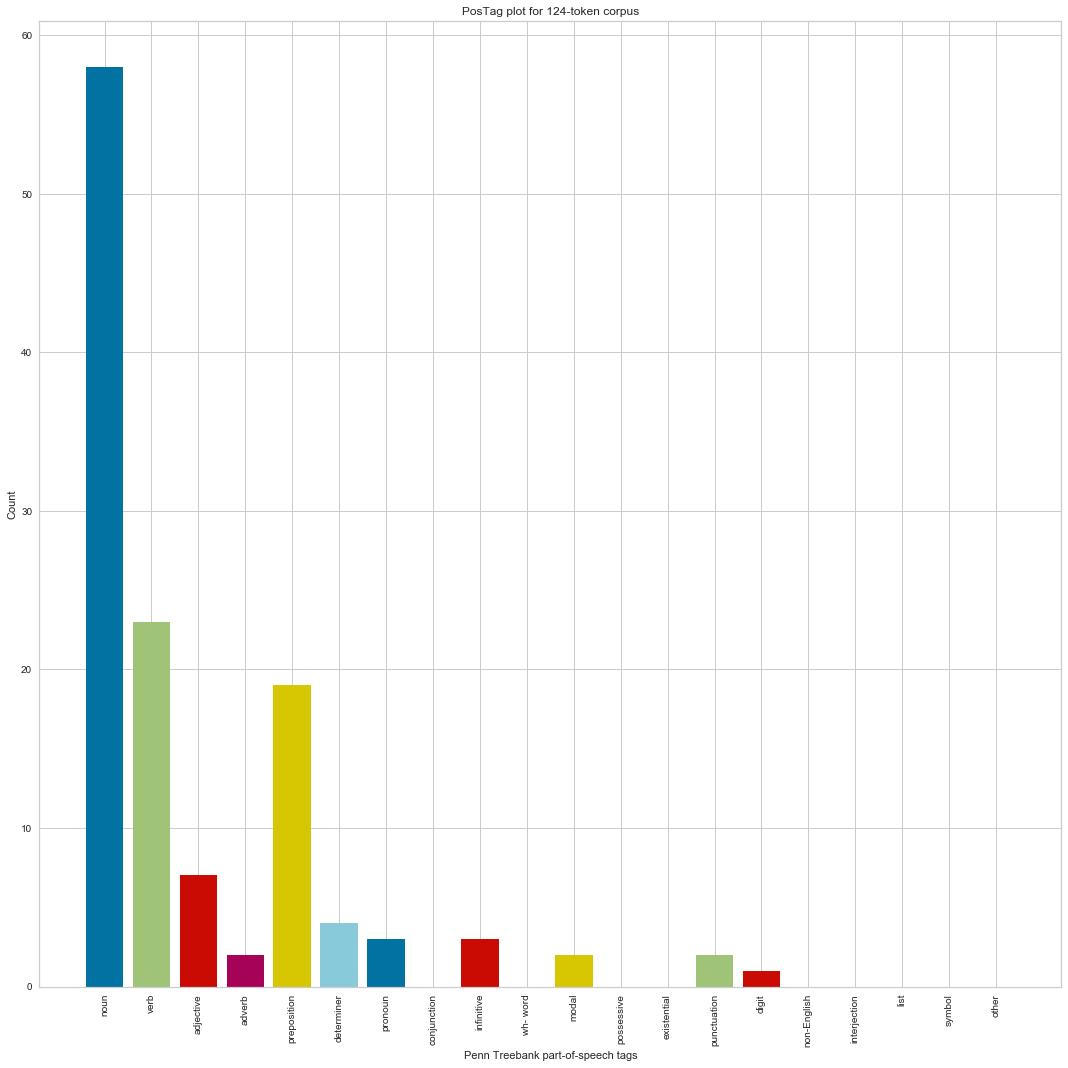

In [35]:
tagged_spacy.append(tagged_titles_spacy)
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_spacy)
viz.show()